# Homework 9

## Instructions
+ Please write you solutions in cells below each problem. Use multiple cells if necessary. 
+ The solutions may be in the form of code, markdown, or a combination of both. Make an effort to present the solutions in a clean fashion.
+ Please submit this notebook in your git repository, under the folder `problemset`. The notebook should be titled `lastname_firstname_hw9.ipynb` (all lower case). 
+ All figures should be legible and clearly labelled. Please follow plotting conventions from HW 8.

### Problem 1: Quadratic functions (5 points)


 (Exercise 7.5 of Langtangen's book) Consider a quadratic function $f(x; a,b,c) = ax^2 + bx + c$. Your tasks are:
1.  Make a class `Quadratic` for representing $f$, where $a, b,$ and $c$ are data attributes, and the methods are

    + `__init__` for storing the attributes $a,b$, and $c$,
    + `value` for computing a value of $f$ at a point $x$,
    + `plot` for plotting the $f$ values in the interval $[L,R]$ at $n$ evenly spaced points,
    + `roots` for computing the two roots (possibly complex).
2. Write good docstrings to document the class `Quadratic`. Type `help(Quadratic)` to print the docstrings. 
3. Write a test function `testQuadratic()` for verifying the implementation of `value` and `roots`. Please generate several instances of quadratics and compare with `numpy.roots`.  


In [70]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt

class Quadratic:
    """
    Quadratic class.
    An instance of the quadratic class has attributes a, b, and c, which store the coefficients of the quadratic
    the form f(x) = ax^2 + bx + c.
    
    Class functions:
    constructor
    value : returns value of f at a point x
    plot : displays a plot of the quadratic over a specified interval
    roots : returns the roots (possible complex) of the quadratic
    """
    def __init__(self, a, b, c):
        """
        Constructor that takes and stores attributes a, b and c to the quadratic.
        Creates an instance of the quadratic class.
        
        Args: a,b,c
        Returns: instance of Quadratic
        """
        self.a = a
        self.b = b
        self.c = c
    
    def value(self, x):
        """
        Compute f at a point x. Returns ax^2 + bx + c
        Args : x
        Returns : Quadratic evaluated at x.
        """
        return self.a*(x**2) + self.b*x + self.c
    
    def plot(self, L, R, n):
        """
        Plots values of f on the interval [L,R] at n evenly spaced points.
        Returns none.
        Args: L,R, n
        Plots the quadratic evaluated at n evenly spaces point over the interval [L,R].
        """
    
        plt.rcParams['figure.figsize'] = [10, 5]
        plt.rcParams['xtick.labelsize'] = 14
        plt.rcParams['ytick.labelsize'] = 14
    
        x = np.linspace(L,R,n) #store x values for plot
        y = self.value(x) #not sure if this will return a vector
        plt.figure()
        plt.plot(x,y)
        plt.xlabel("x", size = 14); plt.ylabel("f(x)", size = 14)
        s = "Graph of f(x) = " + str(self.a) +  "x^2 + " +  str(self.b) + "x + " + str(self.c) 
        plt.title(s)
        plt.show()
        
    def roots(self):
        """
        Returns roots of the quadratic.
        Args: None
        Returns: Roots, possibly comlex
        """
        #return np.roots([self.a, self.b, self.c])
        r = self.b**2 - 4*self.a*self.c
        if r < 0:
            x1 = (-self.b + cm.sqrt(r))/(2*self.a)
            x2 = (-self.b - cm.sqrt(r))/(2*self.a)
            return [x1,x2]
        else:
            x1 = (-self.b + np.sqrt(r))/(2*self.a)
            x2 = (-self.b - np.sqrt(r))/(2*self.a)
            
            r = [x1,x2]
            r.sort(reverse = True)
            return r
            
        
    
    
        

In [73]:

def testQuadratic():
    
    
    
    c1 = [1,-1,-6]; c2 = [1,2,3]; c3 = [4,3,7]; c4 = [-1, 4, 8]
    
    test = [c1,c2,c3,c4]
    for c in test:
        x = np.linspace(-5,5,11)
        Q1 = Quadratic(c[0],c[1],c[2])
        
        vp = np.polyval(c, x)
        vq = Q1.value(x)
        
        rn = np.roots(c)
        rq = Q1.roots()
        
        print("Quadratic", test.index(c), ": \n") 
        print("Numpy evaluation: ", vp)
        print("Quadratic class evaluation: ", vq)
        print("Error: ", np.linalg.norm(vp-vq, 2), "\n")
        print("Numpy roots: ", rn)
        print("Quadratic roots: ", rq)
        print("Error: ", np.linalg.norm(rn-rq, 2), "\n")
    
    
    


testQuadratic()
help(Quadratic)

Quadratic 0 : 

Numpy evaluation:  [24. 14.  6.  0. -4. -6. -6. -4.  0.  6. 14.]
Quadratic class evaluation:  [24. 14.  6.  0. -4. -6. -6. -4.  0.  6. 14.]
Error:  0.0 

Numpy roots:  [ 3. -2.]
Quadratic roots:  [3.0, -2.0]
Error:  0.0 

Quadratic 1 : 

Numpy evaluation:  [18. 11.  6.  3.  2.  3.  6. 11. 18. 27. 38.]
Quadratic class evaluation:  [18. 11.  6.  3.  2.  3.  6. 11. 18. 27. 38.]
Error:  0.0 

Numpy roots:  [-1.+1.41421356j -1.-1.41421356j]
Quadratic roots:  [(-1+1.4142135623730951j), (-1-1.4142135623730951j)]
Error:  3.1401849173675503e-16 

Quadratic 2 : 

Numpy evaluation:  [ 92.  59.  34.  17.   8.   7.  14.  29.  52.  83. 122.]
Quadratic class evaluation:  [ 92.  59.  34.  17.   8.   7.  14.  29.  52.  83. 122.]
Error:  0.0 

Numpy roots:  [-0.375+1.26861145j -0.375-1.26861145j]
Quadratic roots:  [(-0.375+1.2686114456365274j), (-0.375-1.2686114456365274j)]
Error:  0.0 

Quadratic 3 : 

Numpy evaluation:  [-37. -24. -13.  -4.   3.   8.  11.  12.  11.   8.   3.]
Quadratic

### Problem 2: Derived classes (5 points) 

Write a base class called `Circle` with the following methods
+ `__init__` for storing attributes (radius, center)
+ `plot` for plotting the circle
+ `area`, for computing the area of the circle
+ `perimeter` for computing the perimeter of the circle


Then, using `Circle` as a base class, write a derived class called `Ellipse` with the same functionalities. An ellipse is defined by a center, $a$ semi-major axis, and $b$ semi-minor axis.

The area of an ellipse is $\pi a b$, whereas the perimeter of an ellipse is given by the approximate formula (from [wikipedia](https://en.wikipedia.org/wiki/Ellipse))
$$ \text{Perimeter} \approx \pi(a + b) \left( 1 + \frac{3h}{10 + \sqrt{4-3h}} \right) \qquad h = \frac{(a-b)^2 }{(a+b)^2}.$$

Is it better to derive `Ellipse` from `Circle` or vice versa? Briefly discuss.

In [103]:
class Circle():
    """
    Circle class defines a circle object.
    
    Functions:
    constructor
    plot : plots the circle
    area : returns the area of the circle
    perimeter :  returns the circumference
    """
    def __init__(self, radius, center):
        """
        Defines a Circle with a radius and a center point.
        Args: radius, center (list)
        Returns : an instance of circle
        """
        self.radius = radius
        self.center = center
        
    def plot(self):
        """
        Displays a plot of the circle.
        Args: None
        Returns : None
        """
        plt.rcParams['figure.figsize'] = [5, 5]
        theta = np.linspace(0, 2*np.pi, 100)
        
        plt.figure()
        x1 = self.radius*np.cos(theta) + self.center[0]
        x2 = self.radius*np.sin(theta) + self.center[1]
        plt.xlabel("x1", size = 14); plt.ylabel("x2", size = 14)
        s = "Plot of Circle with radius = " + str(self.radius) + " and center = (" + str(self.center[0]) + "," + \
            str(self.center[1]) + ")"
        plt.title(s, size = 14)
        
        plt.plot(x1,x2)
        plt.show()
        
    def area(self):
        """
        Returns the area of the circle.
        """
        return np.pi*(self.radius**2)
    
    def perimeter(self):
        """
        Returns the circumference of the circle.
        """
        return np.pi*(2*self.radius)

In [135]:
class Ellipse(Circle):
    """
    Creates a derived class Ellipse from the Circle class.
    
    Functions:
    constructor
    plot
    area
    perimeter
    """
    def __init__(self, center, a, b):
        """
        Creates an instance of Ellipse with radius, center, semi-major axis a, and semi-minor axis b.
        """
        Circle.__init__(self, radius = 0, center = center)
        self.a = a
        self.b = b
        
    def plot(self):
        """
        Displays ellipse.
        
        Args: None
        Returns: None
        """
        plt.rcParams['figure.figsize'] = [5, 5]
        theta = np.linspace(0, 2*np.pi, 100)
        
        plt.figure()
        x1 = self.a*np.cos(theta) + self.center[0]
        x2 = self.b*np.sin(theta) + self.center[1]
        
        plt.xlabel("x1", size = 14); plt.ylabel("x2", size = 14)
        
        s = "Plot of Ellipse with semi-major = " + str(self.a) + ", semi-minor = " + str(self.b) + \
            " and center = (" + str(self.center[0]) + "," + \
            str(self.center[1]) + ")"
        
        plt.title(s, size = 14)
        
        #set axis limits to show the ellipse
        if self.a > self.b:
            
            plt.xlim([-self.a -1,self.a+1])
            plt.ylim([-self.a-1,self.a+1])
        else:
            plt.xlim([-self.b-1,self.b+1])
            plt.ylim([-self.b-1,self.b+1])
            
        plt.plot(x1,x2)
        plt.show()
    
    def area(self):
        """
        Args:None
        Returns: Area of the ellipse
        """
        
        return np.pi*self.a*self.b
    
    def perimeter(self):
        """
        Args:none
        Returns: Area of the ellipse
        """
        
        h = ((self.a-self.b)**2)/((self.a+self.b)**2)
        
        return np.pi*(self.a+self.b)*(1+(3*h/(10+np.sqrt(4-3*h))))
    
        
    

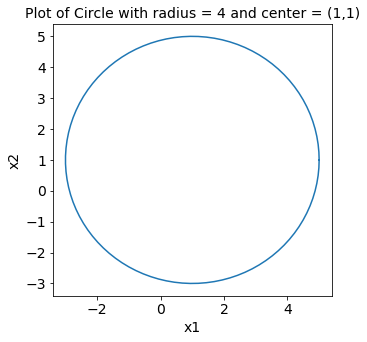

Area =  50.26548245743669 Perimeter =  25.132741228718345


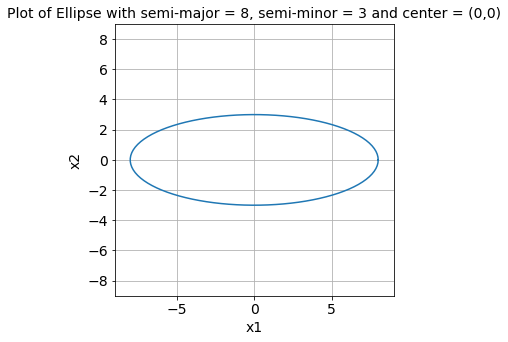

Area =  75.39822368615503 Perimeter =  36.36686235373349


In [136]:
def test():
    C1 = Circle(4,[1,1])
    C1.plot()
    print("Area = ", C1.area(),"Perimeter = ", C1.perimeter())
    
    E = Ellipse([0,0],8,3)
    E.plot()
    print("Area = ", E.area(),"Perimeter = ", E.perimeter())
    
test()

It is better to derive a Circle from an Ellipse. A circle is an ellipse with the major and minor axes both equal to the same value, which is the radius of the circle. Going in this direction would have required no re-writing of the methods in the circle class. We could have derived them straight from the ellipse class as long as the constructor was instantiated properly.